In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [2]:
df = pd.read_csv("cust_data.csv")
df

,income,spending
0,80,24.5
1,85,25.5
2,87,26.1
3,75,22.5
4,78,23.4
5,20,20.0
6,18,15.0
7,18,19.0
8,20,21.0
9,30,22.0


<function matplotlib.pyplot.show(close=None, block=None)>

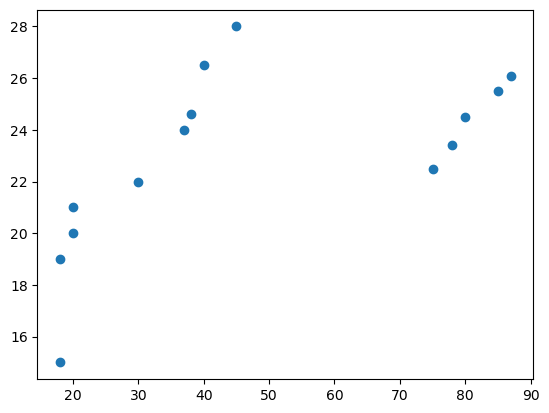

In [4]:
plt.scatter(df.income,df.spending)
plt.show

In [5]:
wcss=[]
for i in range(1,5):
    k=KMeans(n_clusters=i)
    k.fit(df)
    wcss.append(k.inertia_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^

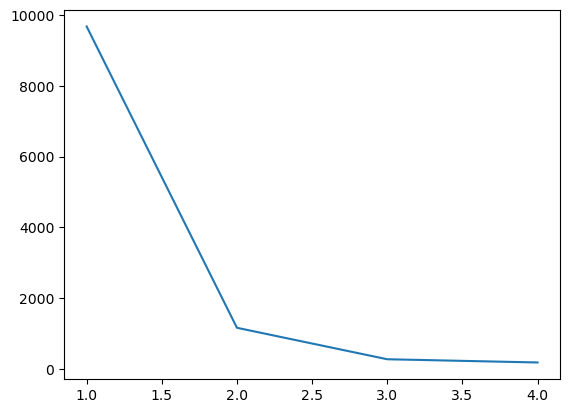

In [6]:
plt.plot(range(1,5),wcss)
plt.show()

In [7]:
wcss

[9682.25785714286, 1160.462222222222, 270.87800000000004, 179.47750000000002]

In [8]:
k=KMeans(n_clusters=2)
k.fit(df)
pred=k.predict(df)
pred

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
df['cluster']=pd.DataFrame(pred,columns=['cluster'])
df

,income,spending,cluster
0,80,24.5,1
1,85,25.5,1
2,87,26.1,1
3,75,22.5,1
4,78,23.4,1
5,20,20.0,0
6,18,15.0,0
7,18,19.0,0
8,20,21.0,0
9,30,22.0,0


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


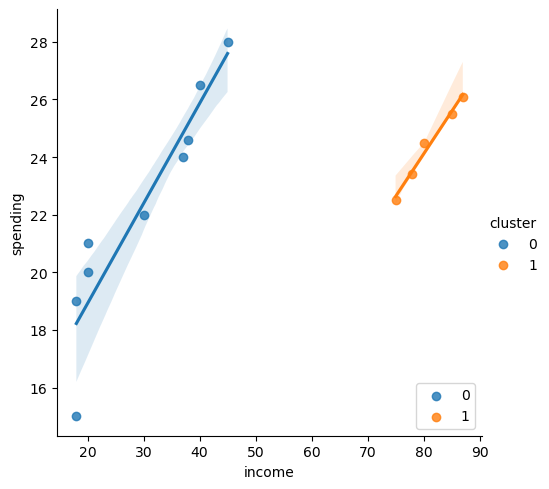

In [10]:
import seaborn as seb
seb.lmplot(x='income',y='spending',data=df,hue='cluster',legend=True)
plt.legend(loc='lower right')
plt.show()